In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os

In [2]:
from lifelines import CoxPHFitter

### Primary Biliary Cirrhosis 
  
The data set found in appendix D of Fleming and Harrington, Counting 
Processes and Survival Analysis, Wiley, 1991. The only differences are: 

- age is in days 
- status is coded as 0=censored, 2=death 
  
Quoting from F&H. "The following pages contain the data from the Mayo Clinic 
trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 
and 1984 **(10 Years)**. A description of the clinical background for the trial and the 
covariates recorded here is in Chapter 0, especially Section 0.2. A more 
extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) 
and in Markus, et al., N Eng J of Med 320:1709-13 (1989). 

"A total of 424 PBC patients, referred to Mayo Clinic during that ten-year 
interval, met eligibility criteria for the randomized placebo controlled 
trial of the drug D-penicillamine. The first 293 cases in the data set 
participated in the randomized trial and contain largely complete data." 
Missing data items are denoted by "." 
  
- Variables: 
    - case number 
    - number of days between registration and the earlier of death, transplantation, or study analysis time in July, 1986 
    - status 
    - drug: 1= D-penicillamine, 2=placebo 
    - age in days 
    - sex: 0=male, 1=female 
    - presence of ascites: 0=no 1=yes 
    - presence of hepatomegaly 0=no 1=yes 
    - presence of spiders 0=no 1=yes 
    - presence of edema 0=no edema and no diuretic therapy for edema; 
           - .5 = edema present without diuretics, or edema resolved by diuretics; 
           - 1 = edema despite diuretic therapy 
    - serum bilirubin in mg/dl 
    - serum cholesterol in mg/dl 
    - albumin in gm/dl 
    - urine copper in ug/day 
    - alkaline phosphatase in U/liter 
    - SGOT in U/ml 
    - triglicerides in mg/dl 
    - platelets per cubic ml / 1000 
    - prothrombin time in seconds 
    - histologic stage of disease 

In [3]:
dataset = pd.read_csv(os.getcwd() + '/Data/PBC_data.csv')

In [4]:
dataset.shape

(293, 20)

In [5]:
dataset.head(10)

,case number,tenure,event,drug,age in days,sex,presence of ascites,presence of hepatomegaly,presence of spiders,presence of edema,serum bilirubin in mg/dl,serum cholesterol in mg/dl,albumin in gm/dl,urine copper in ug/day,alkaline phosphatase in U/liter,SGOT in U/ml,triglicerides in mg/dl,platelets per cubic ml / 1000,prothrombin time in seconds,histologic stage of disease
0,1,400,2,1,21464,1,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
1,2,4500,0,1,20617,1,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
2,3,1012,2,1,25594,0,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
3,4,1925,2,1,19994,1,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
4,6,2503,2,2,24201,1,0,1,0,0.0,0.8,248,3.98,50,944.0,93.00,63,.,11.0,3
5,7,1832,0,2,20284,1,0,1,0,0.0,1.0,322,4.09,52,824.0,60.45,213,204,9.7,3
6,8,2466,2,2,19379,1,0,0,0,0.0,0.3,280,4.00,52,4651.2,28.38,189,373,11.0,3
7,9,2400,2,1,15526,1,0,0,1,0.0,3.2,562,3.08,79,2276.0,144.15,88,251,11.0,2
8,10,51,2,2,25772,1,1,0,1,1.0,12.6,200,2.74,140,918.0,147.25,143,302,11.5,4
9,11,3762,2,2,19619,1,0,1,1,0.0,1.4,259,4.16,46,1104.0,79.05,79,258,12.0,4


In [6]:
dataset.describe()

,case number,tenure,event,drug,age in days,sex,presence of ascites,presence of hepatomegaly,presence of spiders,presence of edema,serum bilirubin in mg/dl,albumin in gm/dl,alkaline phosphatase in U/liter,SGOT in U/ml,prothrombin time in seconds,histologic stage of disease
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.00000,293.000000,293.000000,293.000000
mean,152.887372,2038.665529,0.853242,1.494881,18478.897611,0.887372,0.081911,0.505119,0.290102,0.114334,3.264164,3.516997,2011.67099,122.066143,10.748805,3.017065
std,89.533825,1137.329811,0.990865,0.500829,3857.981917,0.316678,0.274699,0.500829,0.454586,0.280165,4.648182,0.422920,2195.95659,57.757400,1.021904,0.885412
min,1.000000,41.000000,0.000000,1.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.960000,289.00000,26.350000,9.000000,1.000000
25%,75.000000,1216.000000,0.000000,1.000000,15694.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000,3.310000,858.00000,79.050000,10.000000,2.000000
50%,152.000000,1882.000000,0.000000,1.000000,18460.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.300000,3.550000,1258.00000,111.000000,10.600000,3.000000
75%,227.000000,2772.000000,2.000000,2.000000,20891.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.400000,3.800000,2009.00000,151.900000,11.100000,4.000000
max,312.000000,4556.000000,2.000000,2.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,4.640000,13862.40000,457.250000,17.100000,4.000000


In [7]:
dataset.columns

Index(['case number ', 'tenure', 'event', 'drug', 'age in days ', 'sex',
       'presence of ascites', 'presence of hepatomegaly',
       'presence of spiders', 'presence of edema ',
       'serum bilirubin in mg/dl ', 'serum cholesterol in mg/dl ',
       'albumin in gm/dl ', 'urine copper in ug/day ',
       'alkaline phosphatase in U/liter ', 'SGOT in U/ml ',
       'triglicerides in mg/dl ', 'platelets per cubic ml / 1000 ',
       'prothrombin time in seconds ', 'histologic stage of disease '],
      dtype='object')

In [8]:
dataset.drop(['case number '], axis=1, inplace=True)

In [9]:
dataset.replace(to_replace='.', value=float('NaN'), inplace=True)

In [10]:
for i in range(dataset.shape[1]):
    print(dataset.columns[i]+' '+str((dataset.iloc[:, i].isna().sum()/dataset.shape[0]) * 100) )

tenure 0.0
event 0.0
drug 0.0
age in days  0.0
sex 0.0
presence of ascites 0.0
presence of hepatomegaly 0.0
presence of spiders 0.0
presence of edema  0.0
serum bilirubin in mg/dl  0.0
serum cholesterol in mg/dl  9.215017064846416
albumin in gm/dl  0.0
urine copper in ug/day  0.6825938566552902
alkaline phosphatase in U/liter  0.0
SGOT in U/ml  0.0
triglicerides in mg/dl  9.897610921501707
platelets per cubic ml / 1000  1.3651877133105803
prothrombin time in seconds  0.0
histologic stage of disease  0.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tenure                            293 non-null    int64  
 1   event                             293 non-null    int64  
 2   drug                              293 non-null    int64  
 3   age in days                       293 non-null    int64  
 4   sex                               293 non-null    int64  
 5   presence of ascites               293 non-null    int64  
 6   presence of hepatomegaly          293 non-null    int64  
 7   presence of spiders               293 non-null    int64  
 8   presence of edema                 293 non-null    float64
 9   serum bilirubin in mg/dl          293 non-null    float64
 10  serum cholesterol in mg/dl        266 non-null    object 
 11  albumin in gm/dl                  293 non-null    float64
 12  urine co

In [12]:
dataset['serum cholesterol in mg/dl '] = dataset['serum cholesterol in mg/dl '].astype('float')
dataset['urine copper in ug/day '] = dataset['urine copper in ug/day '].astype('float')
dataset['triglicerides in mg/dl '] = dataset['triglicerides in mg/dl '].astype('float')
dataset['platelets per cubic ml / 1000 '] = dataset['platelets per cubic ml / 1000 '].astype('float')

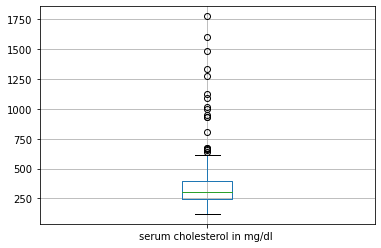

In [13]:
dataset.boxplot(column='serum cholesterol in mg/dl ')
plt.show()

In [14]:
dataset['serum cholesterol in mg/dl '][dataset['serum cholesterol in mg/dl '].isna()] = dataset['serum cholesterol in mg/dl '].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


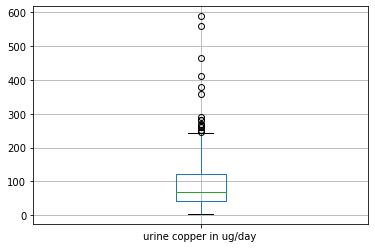

In [15]:
dataset.boxplot(column='urine copper in ug/day ')
plt.show()

In [16]:
dataset['urine copper in ug/day '][dataset['urine copper in ug/day '].isna()] = dataset['urine copper in ug/day '].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


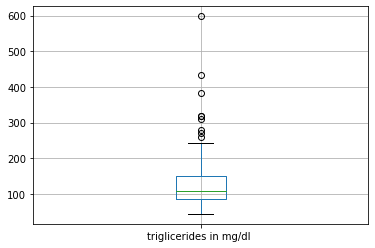

In [17]:
dataset.boxplot(column='triglicerides in mg/dl ')
plt.show()

In [18]:
dataset['triglicerides in mg/dl '][dataset['triglicerides in mg/dl '].isna()] = dataset['triglicerides in mg/dl '].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


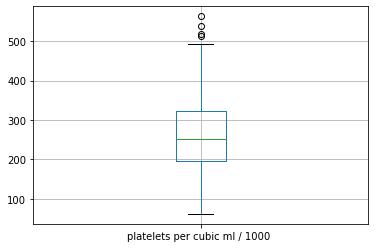

In [19]:
dataset.boxplot(column='platelets per cubic ml / 1000 ')
plt.show()

In [20]:
dataset['platelets per cubic ml / 1000 '][dataset['platelets per cubic ml / 1000 '].isna()] = dataset['platelets per cubic ml / 1000 '].median()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
for i in range(dataset.shape[1]):
    print(dataset.columns[i]+' '+str(len(dataset.iloc[:, i].unique())))

tenure 282
event 2
drug 2
age in days  290
sex 2
presence of ascites 2
presence of hepatomegaly 2
presence of spiders 2
presence of edema  3
serum bilirubin in mg/dl  81
serum cholesterol in mg/dl  189
albumin in gm/dl  131
urine copper in ug/day  152
alkaline phosphatase in U/liter  277
SGOT in U/ml  173
triglicerides in mg/dl  143
platelets per cubic ml / 1000  200
prothrombin time in seconds  44
histologic stage of disease  4


In [22]:
dataset['age in days '].unique()

array([21464, 20617, 25594, 19994, 24201, 20284, 19379, 15526, 25772,
       19619, 21600, 16688, 20535, 23612, 14772, 19060, 19698, 18102,
       21898, 23445, 20555, 20442, 16261, 16463, 19002, 19884, 16417,
       23331, 15116, 15177, 19722, 18731, 19015, 17758, 20604, 22546,
       13378, 20232, 17046, 12285, 12307, 17850, 13727, 15265, 16728,
       17323, 17947, 22336, 19544, 19025, 18460, 24621, 14317, 24020,
       12279, 19567, 16279, 14754, 21324, 16034, 22173, 17031, 22977,
       14684, 16967, 18733, 11912, 18021, 20600, 17841, 11868, 14060,
       18964, 15895, 18972, 18199, 17512, 16990, 24622, 23107, 24585,
       20459, 20392, 17246, 19270, 13616, 15119, 19155, 12227, 16658,
       28018, 13344, 19693, 16944, 26259, 10550, 17703, 18799, 16418,
       20662, 17884, 15712, 25023, 22836, 18393, 16094, 14212, 20256,
       18713, 19295, 15574, 22306, 18137, 17844, 19817, 24803, 20248,
       16736, 19318, 19577, 16109, 15322, 23235, 16154, 22646, 14812,
       22881, 15463,

In [23]:
for i in range(dataset.shape[1]):
    column_name = dataset.columns[i]
    unique_len = len(dataset.iloc[:, i].unique())
    if unique_len < 5:
        print('==========================================')
        print('Loc:'+str(i))
        print(dataset.iloc[:, i].value_counts())
        print('')

Loc:1
0    168
2    125
Name: event, dtype: int64

Loc:2
1    148
2    145
Name: drug, dtype: int64

Loc:4
1    260
0     33
Name: sex, dtype: int64

Loc:5
0    269
1     24
Name: presence of ascites, dtype: int64

Loc:6
1    148
0    145
Name: presence of hepatomegaly, dtype: int64

Loc:7
0    208
1     85
Name: presence of spiders, dtype: int64

Loc:8
0.0    246
0.5     27
1.0     20
Name: presence of edema , dtype: int64

Loc:18
3    112
4    101
2     64
1     16
Name: histologic stage of disease , dtype: int64



In [24]:
dataset.to_csv(os.getcwd()+'/Data/Clean_PBC.csv')

In [25]:
dataset.event = dataset.event.apply(lambda x: 1 if x == 2 else 0)

In [26]:
dataset.rename(columns={'drug': 'D_penicillamine'}, inplace=True)

In [27]:
dataset.D_penicillamine = dataset.D_penicillamine.apply(lambda x: 0 if x == 2 else 1)

In [28]:
dataset.rename(columns={'sex': 'female'}, inplace=True)

In [29]:
edema_dummy = pd.get_dummies(dataset['presence of edema '], prefix='edema')

In [30]:
dataset = pd.concat([dataset, edema_dummy.iloc[:, :edema_dummy.shape[1]-1]], axis=1)
dataset.drop('presence of edema ', axis=1, inplace = True)

In [31]:
hist_stage_dummy = pd.get_dummies(dataset['histologic stage of disease '], prefix='hist_stage', drop_first=True)

In [32]:
dataset = pd.concat([dataset, hist_stage_dummy], axis=1)
dataset.drop('histologic stage of disease ', axis=1, inplace = True)

In [33]:
for i in range(dataset.shape[1]):
    column_name = dataset.columns[i]
    unique_len = len(dataset.iloc[:, i].unique())
    if unique_len < 5:
        print('==========================================')
        print('Loc:'+str(i))
        print(dataset.iloc[:, i].value_counts())
        print('')

Loc:1
0    168
1    125
Name: event, dtype: int64

Loc:2
1    148
0    145
Name: D_penicillamine, dtype: int64

Loc:4
1    260
0     33
Name: female, dtype: int64

Loc:5
0    269
1     24
Name: presence of ascites, dtype: int64

Loc:6
1    148
0    145
Name: presence of hepatomegaly, dtype: int64

Loc:7
0    208
1     85
Name: presence of spiders, dtype: int64

Loc:17
1    246
0     47
Name: edema_0.0, dtype: int64

Loc:18
0    266
1     27
Name: edema_0.5, dtype: int64

Loc:19
0    229
1     64
Name: hist_stage_2, dtype: int64

Loc:20
0    181
1    112
Name: hist_stage_3, dtype: int64

Loc:21
0    192
1    101
Name: hist_stage_4, dtype: int64



In [34]:
dataset.columns

Index(['tenure', 'event', 'D_penicillamine', 'age in days ', 'female',
       'presence of ascites', 'presence of hepatomegaly',
       'presence of spiders', 'serum bilirubin in mg/dl ',
       'serum cholesterol in mg/dl ', 'albumin in gm/dl ',
       'urine copper in ug/day ', 'alkaline phosphatase in U/liter ',
       'SGOT in U/ml ', 'triglicerides in mg/dl ',
       'platelets per cubic ml / 1000 ', 'prothrombin time in seconds ',
       'edema_0.0', 'edema_0.5', 'hist_stage_2', 'hist_stage_3',
       'hist_stage_4'],
      dtype='object')

In [35]:
cph_cat = CoxPHFitter()

In [45]:
cols_to_include = ['tenure', 'event', 'female',
       'presence of ascites', 'presence of hepatomegaly',
       'presence of spiders',
       'edema_0.0', 'hist_stage_2', 'hist_stage_3']

In [46]:
cph_cat.fit(dataset[cols_to_include], 'tenure', event_col='event')

<lifelines.CoxPHFitter: fitted with 293 total observations, 168 right-censored observations>

In [47]:
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


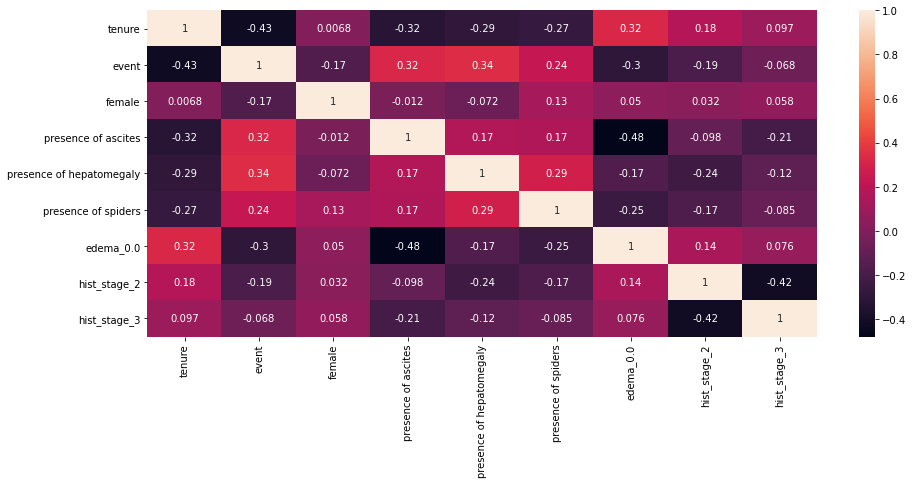

In [48]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
corr_matrix = dataset[cols_to_include].corr()
sns.heatmap(data=corr_matrix, annot=True)
plt.show()
pylab.rcParams['figure.figsize'] = (10, 6)

In [49]:
cph_cat.print_summary()

<lifelines.CoxPHFitter: fitted with 293 total observations, 168 right-censored observations>
             duration col = 'tenure'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 293
number of events observed = 125
   partial log-likelihood = -581.64
         time fit was run = 2020-08-14 12:01:11 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
female                    -0.45       0.64       0.25            -0.93             0.03                 0.39                 1.03
presence of ascites        1.33       3.78       0.28             0.78             1.88                 2.18                 6.54
presence of hepatomegaly   0.74       2.10       0.22             0.31             1.17                 1.37                 3.23
presence of spiders        0.49       1.64       0.20             0.10             0.89                 1.10                 2.43
edema_0.0                 -0.79       0.45       0.23            -1.23            -0.35                 0.29                 0.71
hist_stage_2              -0.48       0.62       0.30            -1.07             0.11                 0.34                 1.11
hist_stage_3              -0.12       0.89       0.22            -0.54             0.31                 0.58                 1.36
                             z      p   -log2(p)
covariate                                       
female                   -1.84   0.07       3.92
presence of ascites       4.75 <0.005      18.90
presence of hepatomegaly  3.39 <0.005      10.50
presence of spiders       2.44   0.01       6.11
edema_0.0                -3.49 <0.005      10.99
hist_stage_2             -1.60   0.11       3.20
hist_stage_3             -0.53   0.60       0.75
---
Concordance = 0.78
Partial AIC = 1177.28
log-likelihood ratio test = 105.80 on 7 df
-log2(p) of ll-ratio test = 63.67

In [50]:
tr_rows = dataset[cols_to_include].iloc[5:10]

In [51]:
tr_rows

,tenure,event,female,presence of ascites,presence of hepatomegaly,presence of spiders,edema_0.0,hist_stage_2,hist_stage_3
5,1832,0,1,0,1,0,1,0,1
6,2466,1,1,0,0,0,1,0,1
7,2400,1,1,0,0,1,1,1,0
8,51,1,1,1,0,1,0,0,0
9,3762,1,1,0,1,1,1,0,0


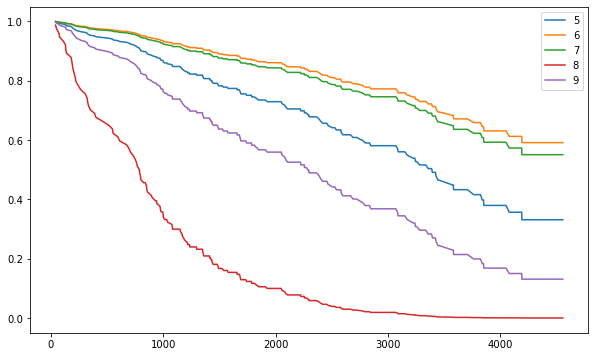

In [52]:
cph_cat.predict_survival_function(tr_rows).plot()
plt.show()

In [ ]:
# ========================================================================================================= #

In [ ]:
# ========================================================================================================= #

In [ ]:
# ========================================================================================================= #